In [96]:
import sys
import os
import pandas as pd

In [97]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/Gau_1.5_edit/Vyas'
files = sorted(os.listdir(filePath))
orig_file = filePath+'/no_attack.txt'

In [98]:
def get_score(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    lines = [l.rstrip('\n') for l in lines if len(l)>6]
    M_vals = {'Ref Count':0, 'Pred Total':0, 'Pred Correct':0, 'Pred Insert':0, 'Pred Delete':0}
    R_vals = {'Ref Count':0, 'Pred Total':0, 'Pred Correct':0, 'Pred Insert':0, 'Pred Delete':0}
    U_vals = {'Ref Count':0, 'Pred Total':0, 'Pred Correct':0, 'Pred Insert':0, 'Pred Delete':0}

    all = {'M':M_vals, 'R':R_vals, 'U':U_vals}

    for line in lines:
        elems = line.split()
        try:
            edit_class = elems[0][0]
        except:
            print(line)
        if edit_class in all.keys():
            all[edit_class]['Ref Count'] += int(elems[1])
            all[edit_class]['Pred Total'] += int(elems[2])
            all[edit_class]['Pred Correct'] += int(elems[3])
            all[edit_class]['Pred Insert'] += int(elems[4])
            all[edit_class]['Pred Delete'] += int(elems[5])
    refs = [919, 2954, 596]
    res = {"Pred Correct":[],"Pred Insert":[]}
    for (key, vals), ref in zip(all.items(), refs):
#         print(f"{key}:\tRef Count: {vals['Ref Count']/ref:.3}\tPred Total: {vals['Pred Total']/ref:.3}\tPred Correct: {vals['Pred Correct']/ref:.3}\tPred Insert: {vals['Pred Insert']/ref:.3}\tPred Delete: {vals['Pred Delete']/ref:.3}")
        res["Pred Correct"].append(round(vals['Pred Correct']/ref*100,3))
        res["Pred Insert"].append(round(vals['Pred Insert']/ref*100,3))
        
    return res

In [99]:
length = []
M_corr = []
R_corr = []
U_corr = []
M_inse = []
R_inse = []
U_inse = []

# Orig
length.append(0)
res = get_score(orig_file)
M_corr.append(res["Pred Correct"][0])
R_corr.append(res["Pred Correct"][1])
U_corr.append(res["Pred Correct"][2])
M_inse.append(res["Pred Insert"][0])
R_inse.append(res["Pred Insert"][1])
U_inse.append(res["Pred Insert"][2])

for file in files:
    if 'beam' not in file:
        break
    length.append(int(file[7]))
    res = get_score(filePath + '/' + file)
    M_corr.append(res["Pred Correct"][0])
    R_corr.append(res["Pred Correct"][1])
    U_corr.append(res["Pred Correct"][2])
    M_inse.append(res["Pred Insert"][0])
    R_inse.append(res["Pred Insert"][1])
    U_inse.append(res["Pred Insert"][2])
    


data = {'length':length,
       'M_corr':M_corr,
       'R_corr':R_corr,
       'U_corr':U_corr,
        'M_inse':M_inse,
       'R_inse':R_inse,
       'U_inse':U_inse
       }
df_v = pd.DataFrame(data)
df_v

,length,M_corr,R_corr,U_corr,M_inse,R_inse,U_inse
0,0,32.753,45.938,52.181,26.551,44.042,44.128
1,1,28.400,36.899,40.268,19.587,36.459,50.839
2,2,24.592,35.714,36.242,16.540,34.800,40.940
3,3,23.613,34.766,31.711,17.084,32.905,37.584
4,4,22.851,31.991,33.557,16.540,31.957,38.926
5,5,22.089,32.126,32.047,15.343,31.246,37.919
6,6,21.980,31.415,30.705,14.908,32.194,34.732
7,7,22.198,30.806,32.550,15.452,32.329,37.919
8,8,22.416,30.433,30.705,14.472,31.009,40.268
9,9,19.369,30.467,26.510,16.104,30.603,40.940


In [100]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/Gau_0.1_edit'
files = sorted(os.listdir(filePath))
orig_file = filePath+'/'+files[-1]
files

['full_N1_with_adv_not_removed.txt',
 'full_N2_with_adv_not_removed.txt',
 'full_N3_with_adv_not_removed.txt',
 'full_N4_with_adv_not_removed.txt',
 'full_N5_with_adv_not_removed.txt',
 'full_N6_with_adv_not_removed.txt',
 'full_N7_with_adv_not_removed.txt',
 'full_N8_with_adv_not_removed.txt',
 'full_N9_with_adv_not_removed.txt',
 'orig_with_adv_not_removed.txt']

In [101]:
length = []
M_corr = []
R_corr = []
U_corr = []
M_inse = []
R_inse = []
U_inse = []

# Orig
length.append(0)
res = get_score(orig_file)
M_corr.append(res["Pred Correct"][0])
R_corr.append(res["Pred Correct"][1])
U_corr.append(res["Pred Correct"][2])
M_inse.append(res["Pred Insert"][0])
R_inse.append(res["Pred Insert"][1])
U_inse.append(res["Pred Insert"][2])


for file in files:
    if 'DS_Store' in file or "Vyas" in file or "orig" in file:
        continue
    length.append(int(file[6]))
    res = get_score(filePath + '/' + file)
    M_corr.append(res["Pred Correct"][0])
    R_corr.append(res["Pred Correct"][1])
    U_corr.append(res["Pred Correct"][2])
    M_inse.append(res["Pred Insert"][0])
    R_inse.append(res["Pred Insert"][1])
    U_inse.append(res["Pred Insert"][2])

data = {'length':length,
       'M_corr':M_corr,
       'R_corr':R_corr,
       'U_corr':U_corr,
        'M_inse':M_inse,
       'R_inse':R_inse,
       'U_inse':U_inse
       }
df_gau_01 = pd.DataFrame(data)
df_gau_01

,length,M_corr,R_corr,U_corr,M_inse,R_inse,U_inse
0,0,32.753,44.956,54.362,28.727,43.907,43.121
1,1,28.292,38.863,42.282,21.763,41.435,54.866
2,2,26.224,37.813,38.926,20.892,37.136,47.987
3,3,27.748,37.982,38.255,20.239,35.647,43.792
4,4,24.810,35.680,34.228,21.110,36.561,40.940
5,5,24.374,35.037,34.060,17.410,36.561,42.450
6,6,24.810,34.733,32.215,15.669,35.613,43.456
7,7,24.374,33.209,32.718,17.954,35.274,40.604
8,8,24.918,35.274,33.389,19.042,37.136,47.819
9,9,25.245,33.345,32.047,18.498,35.477,44.631


In [102]:
import os
filePath = '/Users/yufanwang/Desktop/Study/Project/Data/v003_0.1'
files = sorted(os.listdir(filePath))
orig_file = filePath+'/'+"orig_with_adv_not_removed.txt"
files

['.DS_Store',
 'attacks_perp_old',
 'full_N1_with_adv_not_removed.txt',
 'full_N2_with_adv_not_removed.txt',
 'full_N3_with_adv_not_removed.txt',
 'full_N4_with_adv_not_removed.txt',
 'full_N5_with_adv_not_removed.txt',
 'full_N6_with_adv_not_removed.txt',
 'full_N7_with_adv_not_removed.txt',
 'full_N8_with_adv_not_removed.txt',
 'full_N9_with_adv_not_removed.txt',
 'orig_with_adv_not_removed.txt',
 'perp']

In [103]:
length = []
M_corr = []
R_corr = []
U_corr = []
M_inse = []
R_inse = []
U_inse = []

# Orig
length.append(0)
res = get_score(orig_file)
M_corr.append(res["Pred Correct"][0])
R_corr.append(res["Pred Correct"][1])
U_corr.append(res["Pred Correct"][2])
M_inse.append(res["Pred Insert"][0])
R_inse.append(res["Pred Insert"][1])
U_inse.append(res["Pred Insert"][2])



for file in files:
    if 'DS_Store' in file or "Vyas" in file or "orig" in file or "perp" in file:
        continue
    length.append(int(file[6]))
    res = get_score(filePath + '/' + file)
    M_corr.append(res["Pred Correct"][0])
    R_corr.append(res["Pred Correct"][1])
    U_corr.append(res["Pred Correct"][2])
    M_inse.append(res["Pred Insert"][0])
    R_inse.append(res["Pred Insert"][1])
    U_inse.append(res["Pred Insert"][2])
    


data = {'length':length,
       'M_corr':M_corr,
       'R_corr':R_corr,
       'U_corr':U_corr,
        'M_inse':M_inse,
       'R_inse':R_inse,
       'U_inse':U_inse
       }
df_adv_003 = pd.DataFrame(data)
df_adv_003

,length,M_corr,R_corr,U_corr,M_inse,R_inse,U_inse
0,0,32.318,42.214,49.497,27.748,46.987,39.933
1,1,27.965,38.524,40.101,25.680,44.008,51.342
2,2,25.898,39.370,36.913,22.089,44.076,61.577
3,3,28.727,39.336,39.765,22.742,58.057,46.812
4,4,27.965,39.167,37.416,23.177,48.544,50.503
5,5,25.027,37.915,35.906,22.633,42.891,51.846
6,6,25.462,39.269,35.570,20.892,44.651,50.839
7,7,25.354,37.407,36.913,28.727,42.349,50.839
8,8,25.789,38.863,37.919,22.089,38.422,53.020
9,9,24.483,37.475,37.584,23.613,44.854,56.544


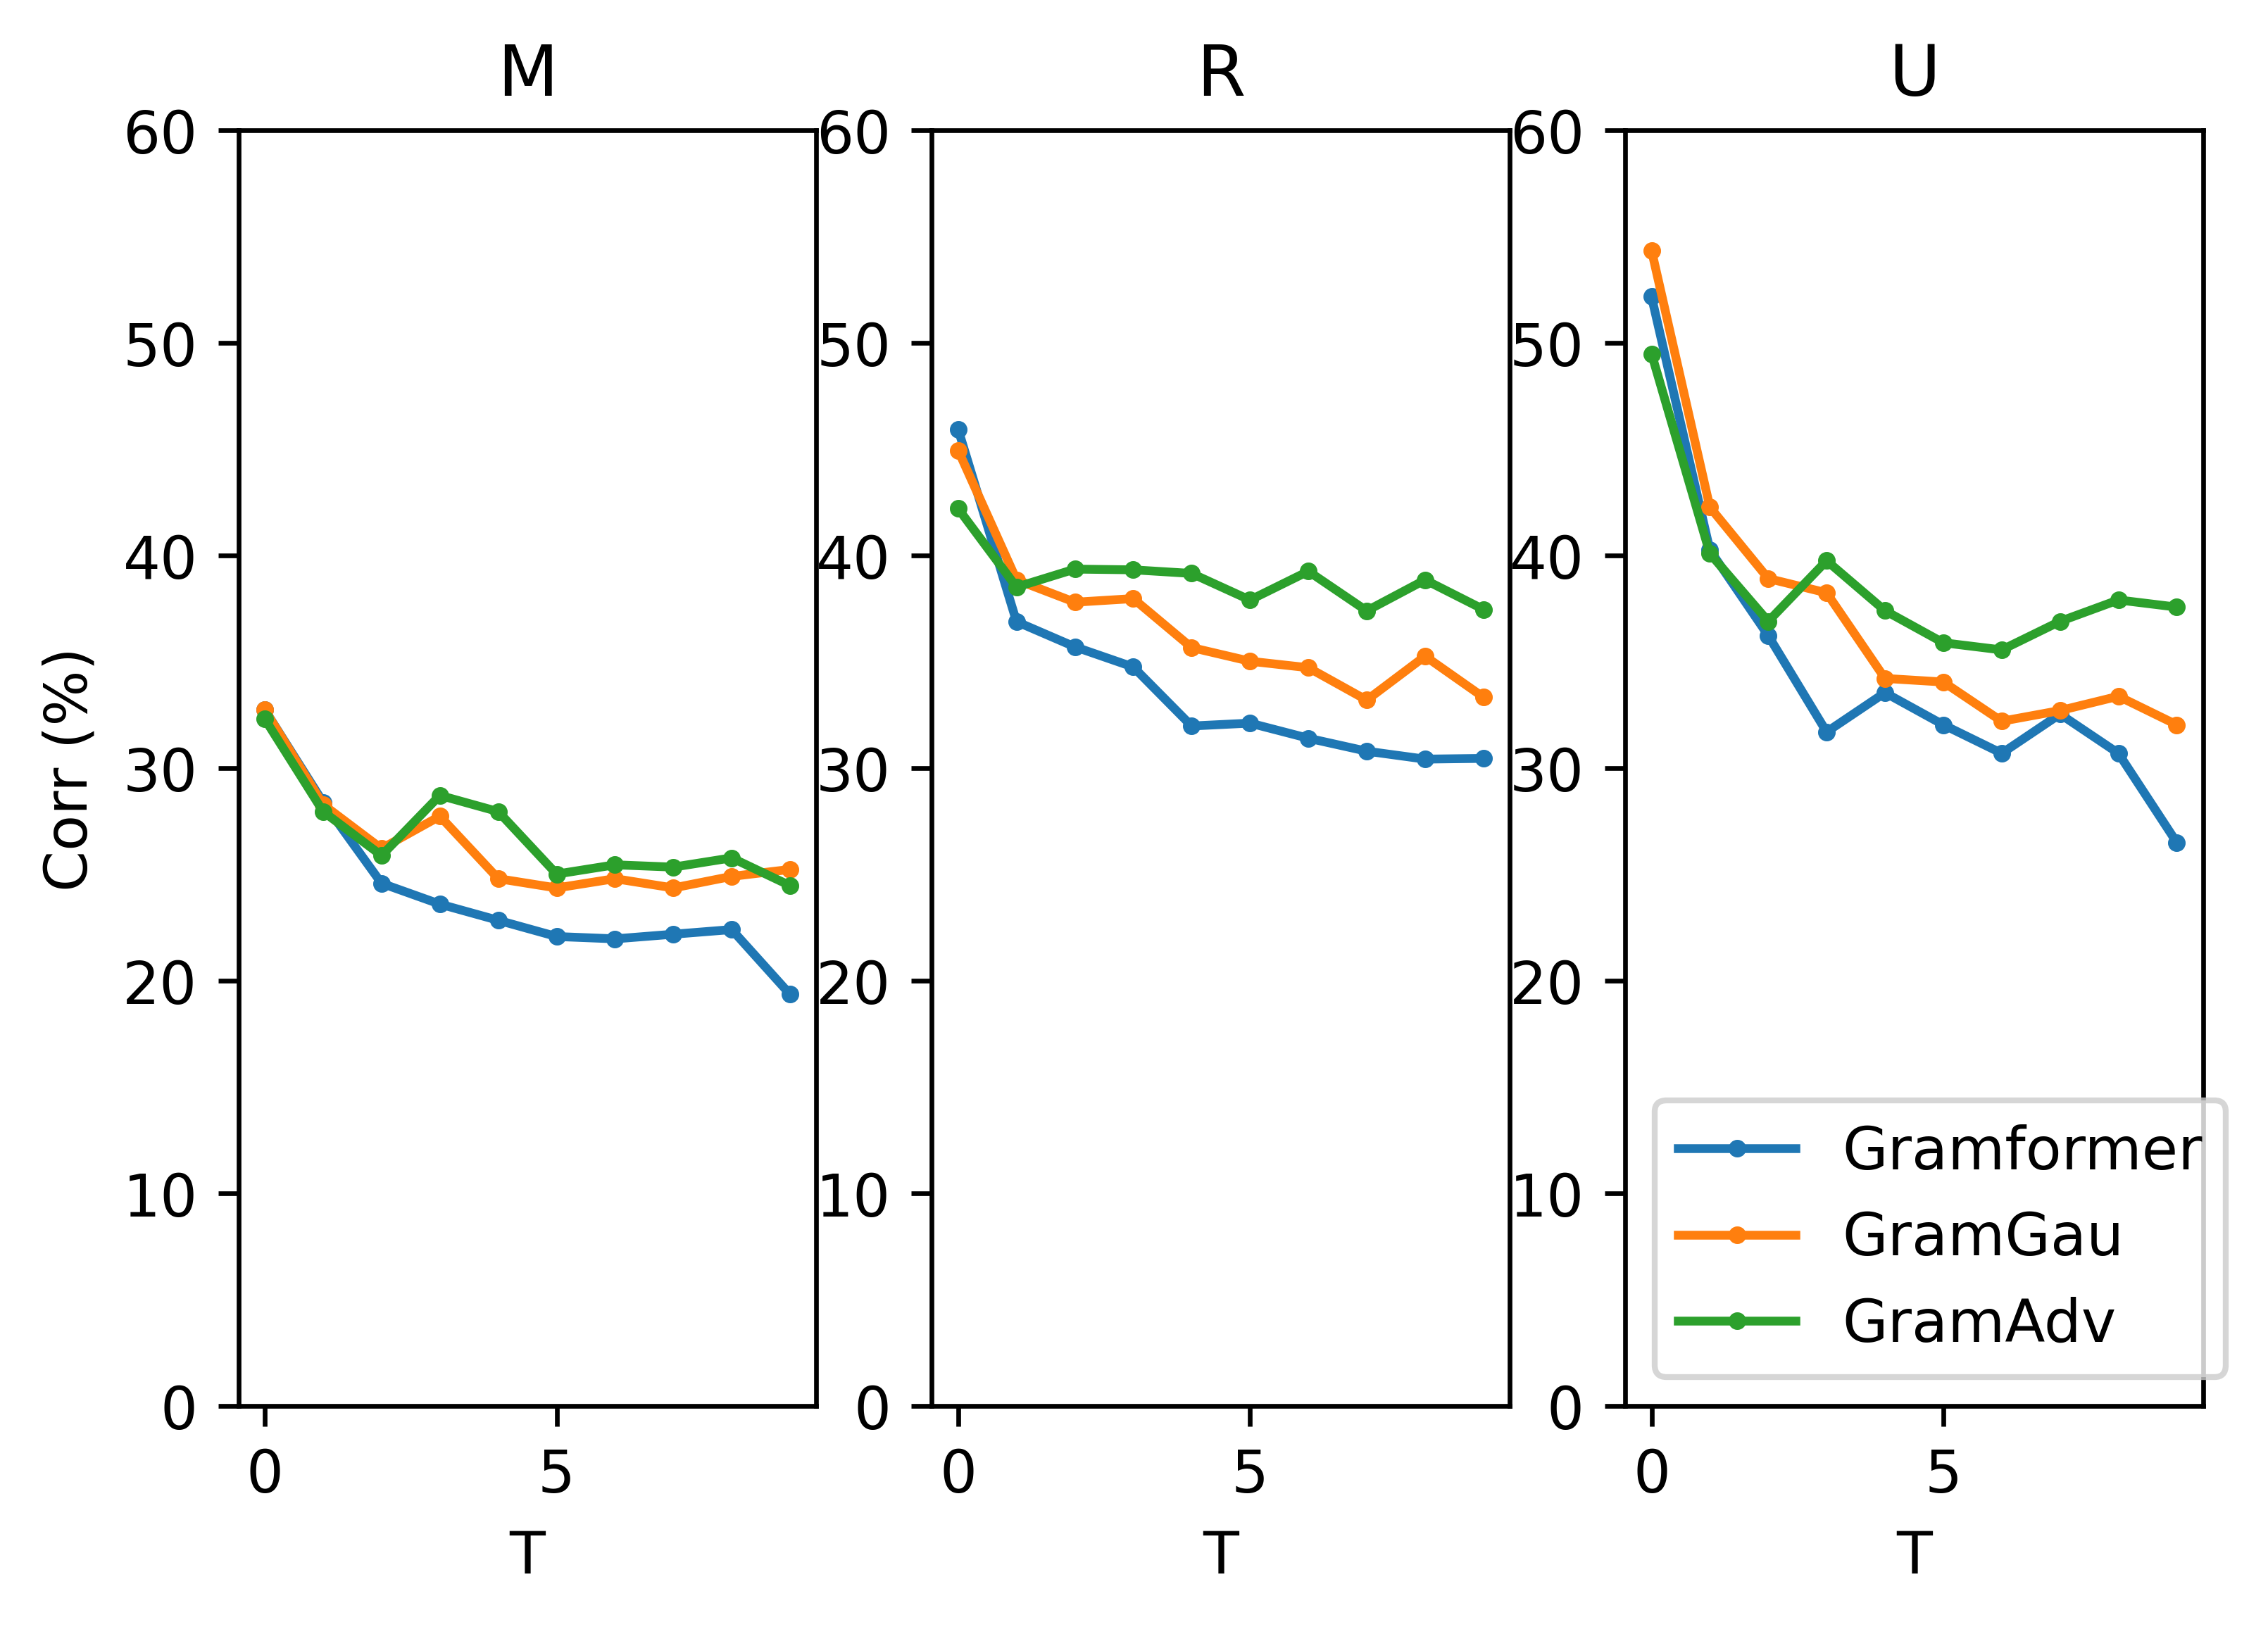

In [104]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)

for idx, item in enumerate(["M_corr","R_corr","U_corr"]):
    plt.subplot(1, 3, idx+1)
    plt.plot(df_v['length'], df_v[item], marker='o',markersize=2,label="Gramformer") # 作y1 = x 图，并标记此线名为linear
    plt.plot(df_gau_01['length'], df_gau_01[item], marker='o',markersize=2,label="GramGau") # 作y1 = x 图，并标记此线名为linear
    plt.plot(df_adv_003['length'], df_adv_003[item], marker='o',markersize=2,label="GramAdv") # 作y1 = x 图，并标记此线名为linear
    
    plt.ylim((0, 60))
    plt.xlabel('T') #设置x轴名称 x label
    if idx == 0:
        plt.ylabel('Corr (%)') #设置y轴名称 y label
    plt.title(item[:1])
    if idx == 2:
        plt.legend()
    

# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
plt.ylim((0, 60))

plt.legend() #自动检测要在图例中显示的元素，并且显示

# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化


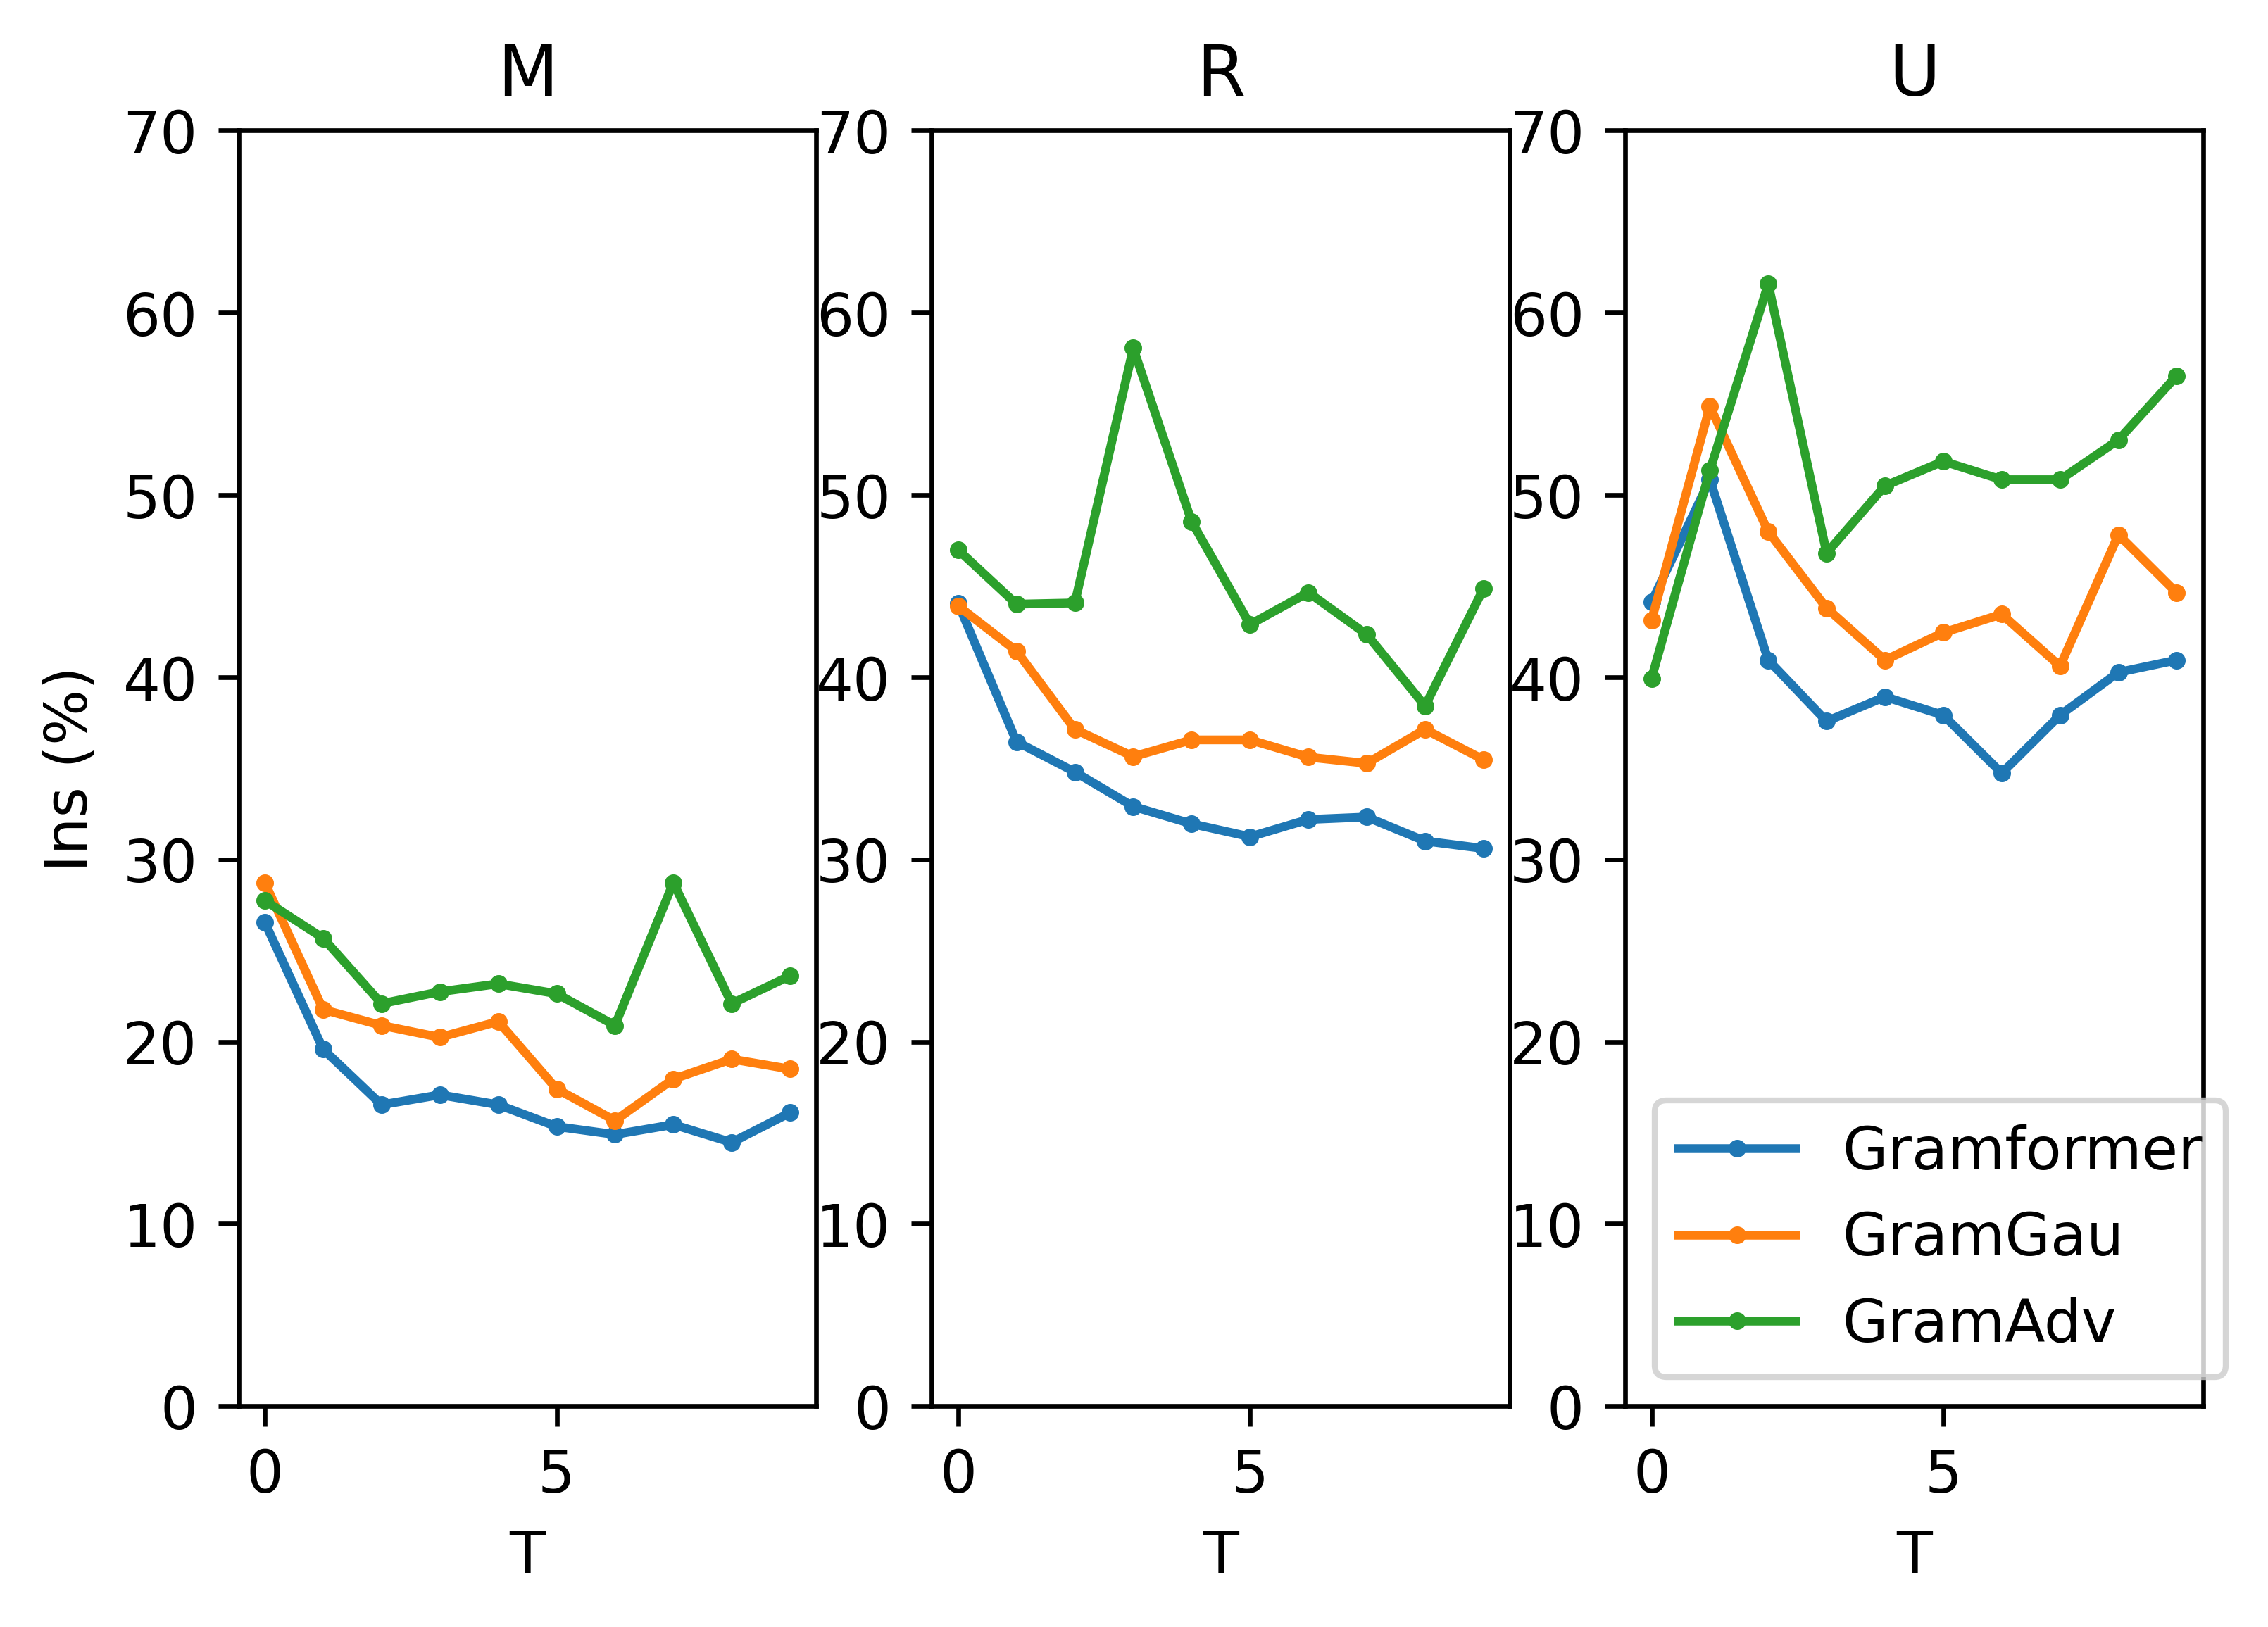

In [110]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator

# x_major_locator=MultipleLocator(5)

fig, ax = plt.subplots(dpi=600)

for idx, item in enumerate(["M_inse","R_inse","U_inse"]):
    plt.subplot(1, 3, idx+1)
    plt.plot(df_v['length'], df_v[item], marker='o',markersize=2,label="Gramformer") # 作y1 = x 图，并标记此线名为linear
    plt.plot(df_gau_01['length'], df_gau_01[item], marker='o',markersize=2,label="GramGau") # 作y1 = x 图，并标记此线名为linear
    plt.plot(df_adv_003['length'], df_adv_003[item], marker='o',markersize=2,label="GramAdv") # 作y1 = x 图，并标记此线名为linear
    
    plt.ylim((0, 70))
    plt.xlabel('T') #设置x轴名称 x label
    if idx == 0:
        plt.ylabel('Ins (%)') #设置y轴名称 y label
    plt.title(item[:1])
    if idx == 2:
        plt.legend()
    

# ax.set_title('The Effect of Adding Gaussian Noise on Gramformer Model') #设置图名为Simple Plot
# plt.ylim((0, 60))

plt.legend() #自动检测要在图例中显示的元素，并且显示

# ax.xaxis.set_major_locator(x_major_locator)
plt.show() #图形可视化
